In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ESN import ESN
from learn_esn import train_esn
import gc

In [2]:
df = pd.read_csv('../datasets/processed/usage_centered.csv')
data = df['usage'][:2000].copy()
del df
gc.collect()
data.shape

(1000,)

In [3]:
input_length = 250

In [4]:
esn = ESN(1, 1000, 1)
train_esn(esn, data, input_length, alpha=2)

(749, 500)


In [5]:
esn.reservoir = [0.0 for i in range(esn.reservoir_size)]
output = [0] * len(data)
for i in range (len(data)):
    if i < input_length:
        esn.get_output(data[i])
    else:
        output[i] = esn.get_output(0)


([<matplotlib.lines.Line2D at 0x153997d5e50>],
 [<matplotlib.lines.Line2D at 0x153997c21f0>])

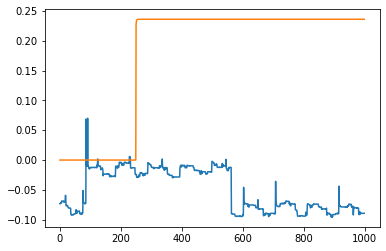

In [6]:
plt.plot(data), plt.plot(output)